# Dispersion Plots

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set()
%matplotlib inline

In [6]:
data_dir = '/home/rca2t/Public/ETA/data'
OHCO = ['title_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
vocab = pd.read_csv(data_dir + '/austen-vocab.csv', index_col='term_id')
tokens = pd.read_csv(data_dir + '/austen-tokens.csv', index_col=OHCO)
library = pd.read_csv(data_dir + '/austen-library.csv')

# Check out a book

In [158]:
book_name = 'Persuasion'
book_id = library[library.title.str.contains(book_name)].index[0]
book = tokens.loc[book_id]

In [159]:
book.head()

token_str  term_str  term_id
chap_num para_num sent_num token_num                             
1        1        0        0               Sir       sir    11838
                           1            Walter    walter    14184
                           2            Elliot    elliot     4360
                           3                of        of     8866
                           4          Kellynch  kellynch     7404

# Simplify Dataframe

In [220]:
B = book['term_str'].reset_index(drop=True).to_frame()
B.index.name = 'token_pos'

In [221]:
B.head()

,term_str
token_pos,
0,sir
1,walter
2,elliot
3,of
4,kellynch


# Dispersion plots of words

In [244]:
def get_strip(words, width=20):
    nrows = len(words)
    fig, axes = plt.subplots(nrows=nrows, ncols=1)
    axes[0].set_title('Dispersion Plots', size=20, pad=20)
    for i, word in enumerate(words):
        (B.term_str == word).astype('int').plot(figsize=(width, nrows), ax=axes[i], yticks=[])
        axes[i].set_ylabel(word, rotation=0, labelpad=50, size=16, ha='left')

In [245]:
names = 'walter elizabeth russell anne wentworth mary lyme bath'.split()

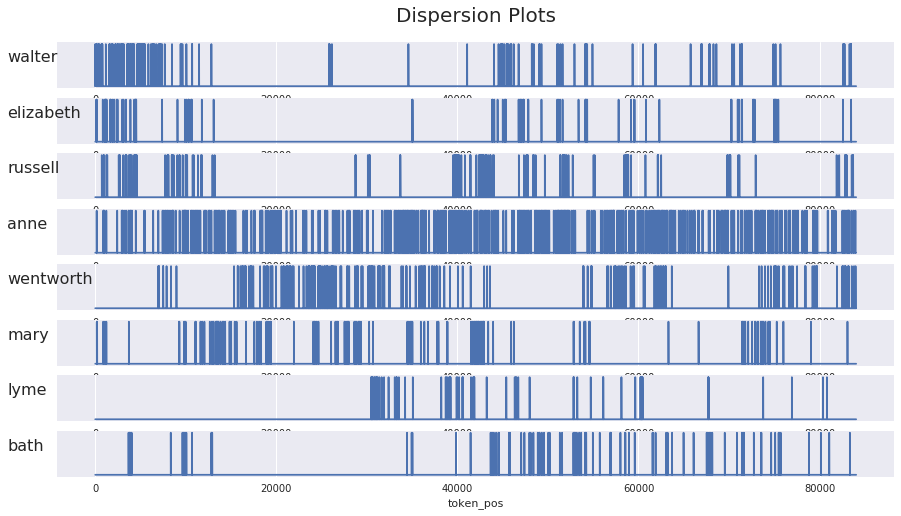

In [246]:
get_strip(names, width=15)

# Seaborn Strip Plots

In [247]:
def plot_words(words):    
    X = B[B.term_str.isin(words)].reset_index()
    plt.figure(figsize=(22, len(words)))
    ax = sns.stripplot(y='term_str',x='token_pos', data=X, orient='h', marker=".", color='navy', size=15)
    ax.set_title('Dispersion Plots', size=30, pad=20)
    ax.set_xlabel('Narrative Time', size=20)
    ax.set_ylabel('Token', size=20)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.tight_layout()
    plt.show()

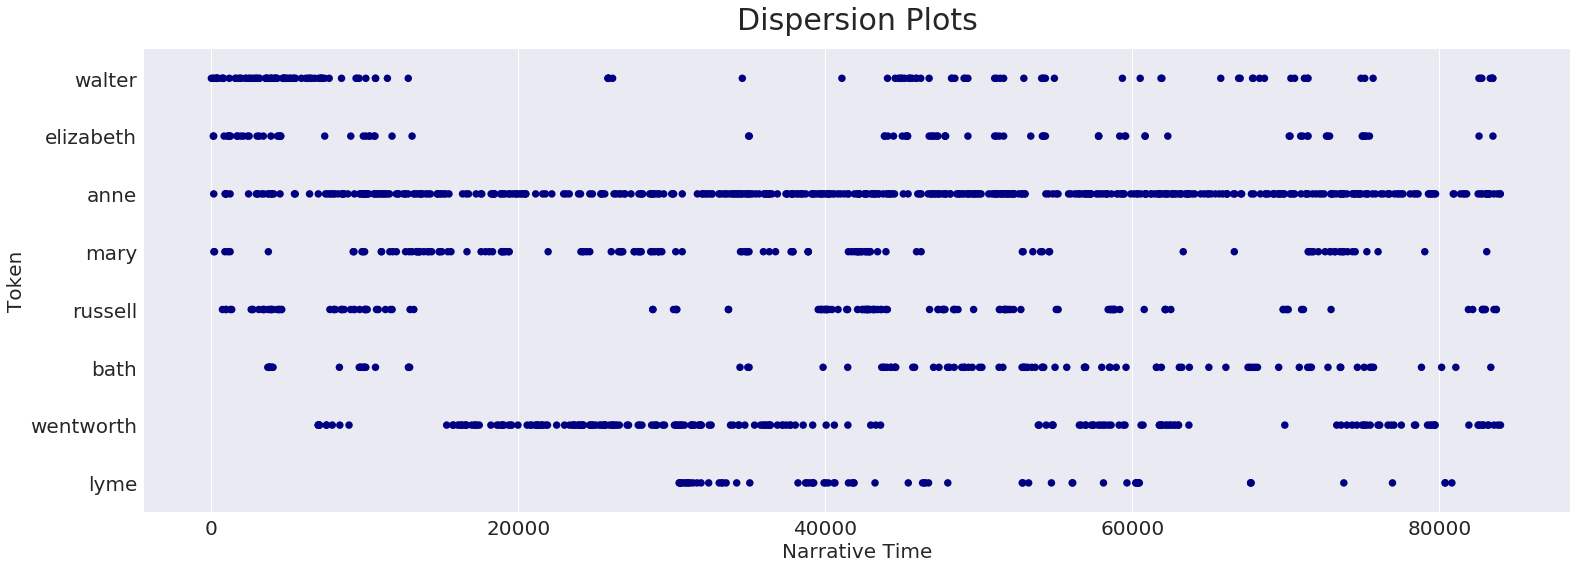

In [248]:
plot_words(names)